&emsp;&emsp;Iris 鸢尾花数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含3类共150条记录，每类各50个数据，每个数据都有4个属性：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个属性预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一类，但据说现实中，这三种花的基本判别依据其实是种子（因为花瓣非常容易枯萎）。

&emsp;&emsp;下面对 iris 进行探索性分析，首先导入相关包和数据集：

In [1]:
# 导入相关包
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# 导入数据集
df = pd.read_csv('F:\pydata\dataset\kaggle\iris.csv', usecols=[1, 2, 3, 4, 5])

&emsp;&emsp;查看数据集的头 5 条记录：

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


&emsp;&emsp;查看数据集各属性列的摘要统计信息：

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


&emsp;&emsp;通过Violinplot 和 Pointplot，分别从数据分布和斜率，观察各属性与类别之间的关系：

In [5]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 

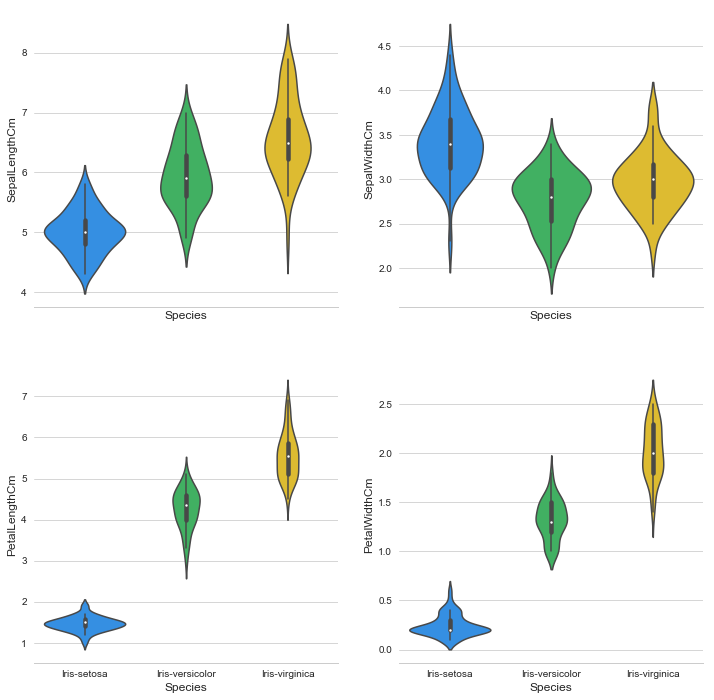

In [10]:
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=df, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=df, palette=antV, ax=axes[1, 1])

plt.show()

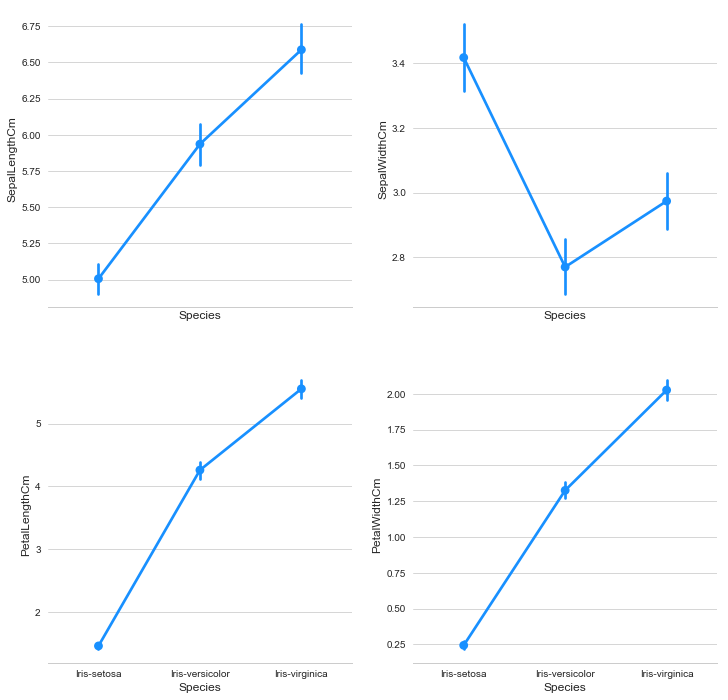

In [11]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(left=True)

sns.pointplot(x='Species', y='SepalLengthCm', data=df, color=antV[0], ax=axes[0, 0])
sns.pointplot(x='Species', y='SepalWidthCm', data=df, color=antV[0], ax=axes[0, 1])
sns.pointplot(x='Species', y='PetalLengthCm', data=df, color=antV[0], ax=axes[1, 0])
sns.pointplot(x='Species', y='PetalWidthCm', data=df, color=antV[0], ax=axes[1, 1])

plt.show()

&emsp;&emsp;生成各属性之间关系的矩阵图：

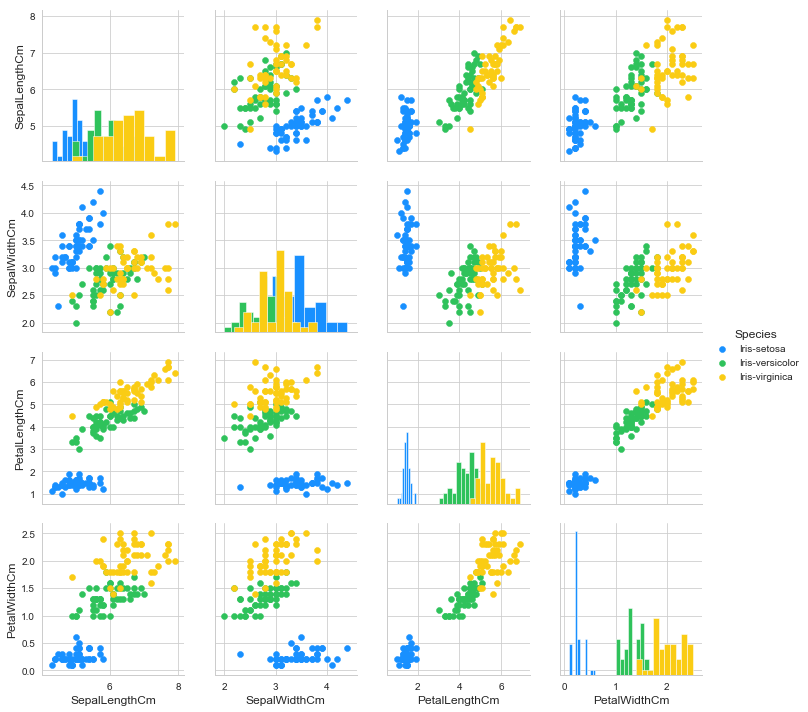

In [8]:
g = sns.PairGrid(data=df, palette=antV, hue= 'Species')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()